# TITANIC PROJECT

In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.shape

(891, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Observations:
   #### 1. Sex , Cabin and Embark have null values.

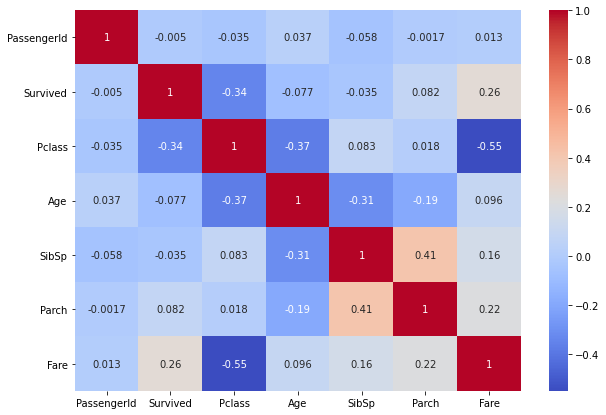

In [8]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

# Observation:
 ### Age has highly corelated with Pclass we will change NAN values of age with the help of Pclass

In [9]:
Age1 = df.loc[df.Pclass == 1].Age.mean()
Age2 = df.loc[df.Pclass == 2].Age.mean()
Age3 = df.loc[df.Pclass == 3].Age.mean()

In [10]:
t= df.loc[df.Pclass == 1]
t2= df.loc[df.Pclass == 2]
t3= df.loc[df.Pclass == 3]
t.Age.fillna(Age1, inplace = True)
t2.Age.fillna(Age2, inplace = True)
t3.Age.fillna(Age3, inplace = True)
print( t.isna().sum(),"\n\n",t2.isna().sum(),"\n\n",t3.isna().sum())

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          40
Embarked        2
dtype: int64 

 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          168
Embarked         0
dtype: int64 

 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          479
Embarked         0
dtype: int64


In [11]:
df=t.append(t2.append(t3),ignore_index = True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
from sklearn.utils import shuffle
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,E46,S
3,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00000,0,0,113783,26.5500,C103,S
4,24,1,1,"Sloper, Mr. William Thompson",male,28.00000,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.00000,0,0,7552,10.5167,NaN,S
887,885,0,3,"Sutehall, Mr. Henry Jr",male,25.00000,0,0,SOTON/OQ 392076,7.0500,NaN,S
888,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.00000,0,5,382652,29.1250,NaN,Q
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,NaN,S


Since data Pclass is following a pattern we are shuffling the data

In [13]:
df = shuffle(df)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
693,526,0,3,"Farrell, Mr. James",male,40.5,0,0,367232,7.7500,NaN,Q
325,530,0,2,"Hocking, Mr. Richard George",male,23.0,2,1,29104,11.5000,NaN,S
361,706,0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.0000,NaN,S
24,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
404,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
819,771,0,3,"Lievens, Mr. Rene Aime",male,24.0,0,0,345781,9.5000,NaN,S
387,828,1,2,"Mallet, Master. Andre",male,1.0,0,2,S.C./PARIS 2079,37.0042,NaN,C
422,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S
527,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,A/5 3540,8.0500,NaN,S


In [14]:
df.Embarked.mode()

0    S
dtype: object




##### We are encoding Sex and Embarked to a numerical values and replacing NAN values in Embarked with most repeated values

In [15]:
df.Embarked.fillna("S", inplace = True)

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
df.Embarked=df.Embarked.astype('str')
df.Embarked=LE.fit_transform(df.Embarked)
df.Sex = LE.fit_transform(df.Sex)

##### Since ["PassengerId","Name","Ticket"] have no effect on the data we are droping the same
#### and cabin have nearly 80% null values we are deciding to drop the column.

In [18]:
df.drop(["PassengerId","Name","Cabin","Ticket"], axis = 1, inplace = True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
693,0,3,1,40.5,0,0,7.7500,1
325,0,2,1,23.0,2,1,11.5000,2
361,0,2,1,39.0,0,0,26.0000,2
24,0,1,1,54.0,0,1,77.2875,2
404,0,3,1,2.0,3,1,21.0750,2
...,...,...,...,...,...,...,...,...
819,0,3,1,24.0,0,0,9.5000,2
387,1,2,1,1.0,0,2,37.0042,0
422,0,3,0,18.0,2,0,18.0000,2
527,1,3,1,18.0,0,0,8.0500,2


In [19]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.292875,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.210527,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,37.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


Above observaation shows there is no null value and Replacing Null values in Age didnt have much effect in mean of age


# Noting the Correlation with Target variable Survied

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

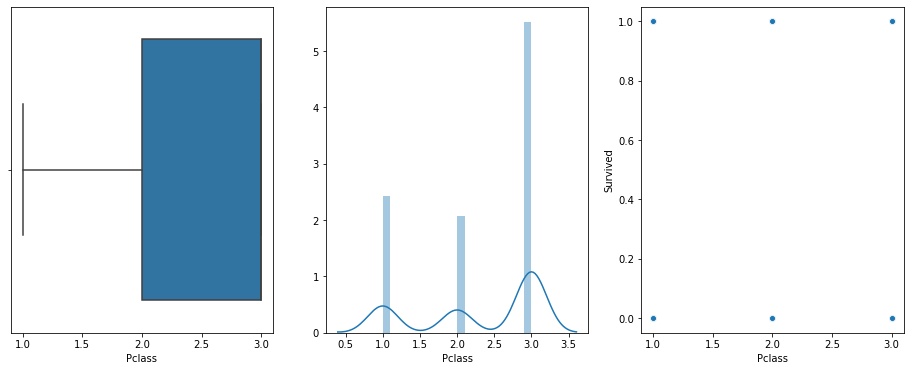

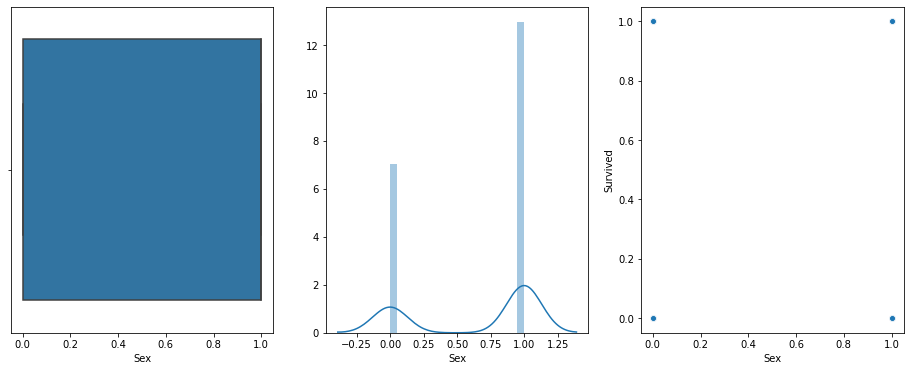

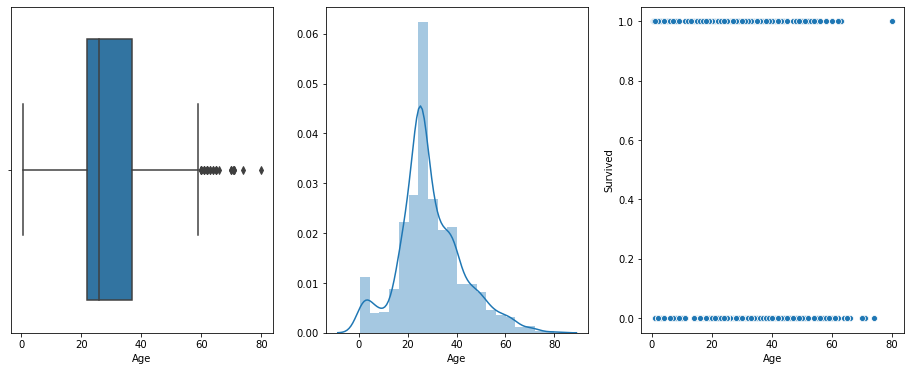

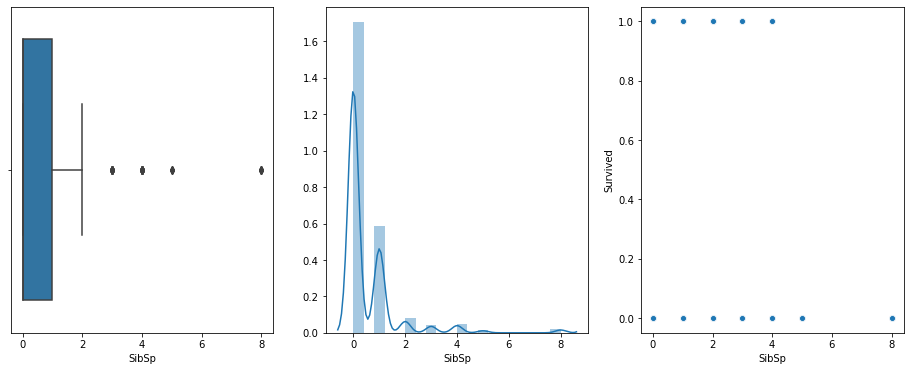

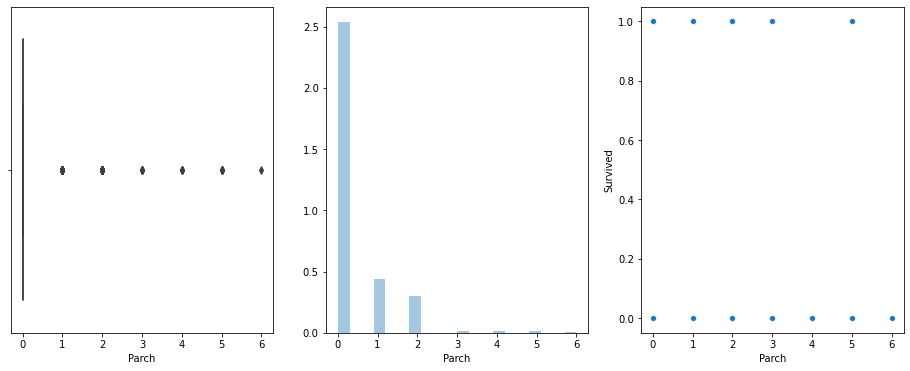

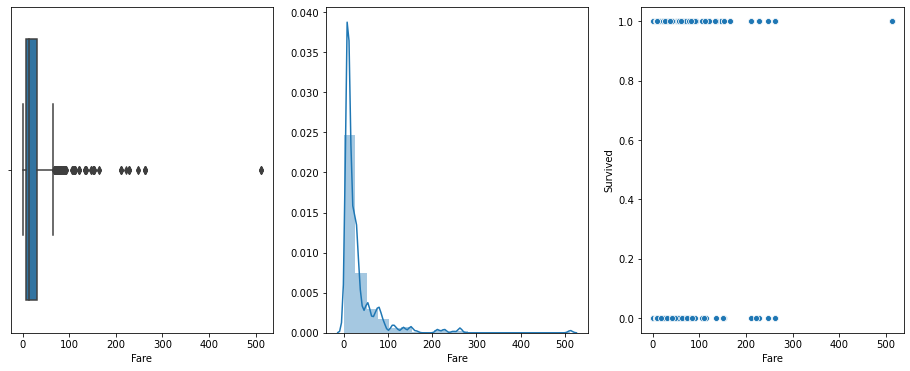

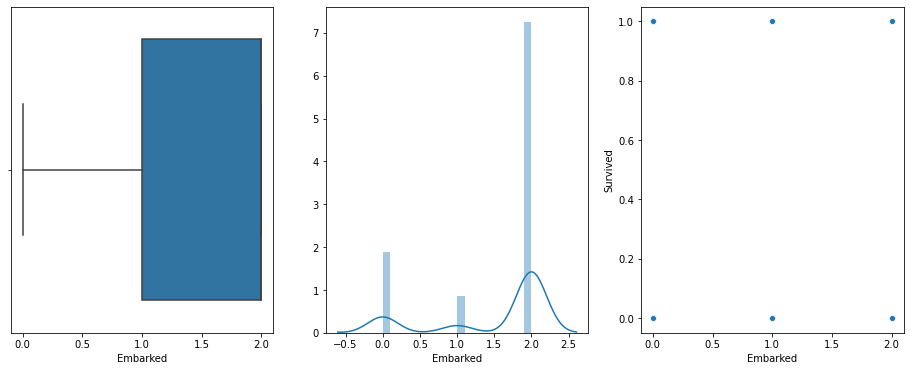

In [21]:
target_variable = "Survived"
feature_variable = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

def num_plots(feature_name):
    fig, axs = plt.subplots(1, 3, figsize=(16, 6))
    sns.boxplot(x=df[feature_name], ax=axs[0])
    sns.distplot(df[feature_name], bins=20, kde=True, ax=axs[1])
    sns.scatterplot(data=df, x=feature_name, y=target_variable, ax=axs[2])
    plt.show()
    
for i in feature_variable:
    num_plots(i)    

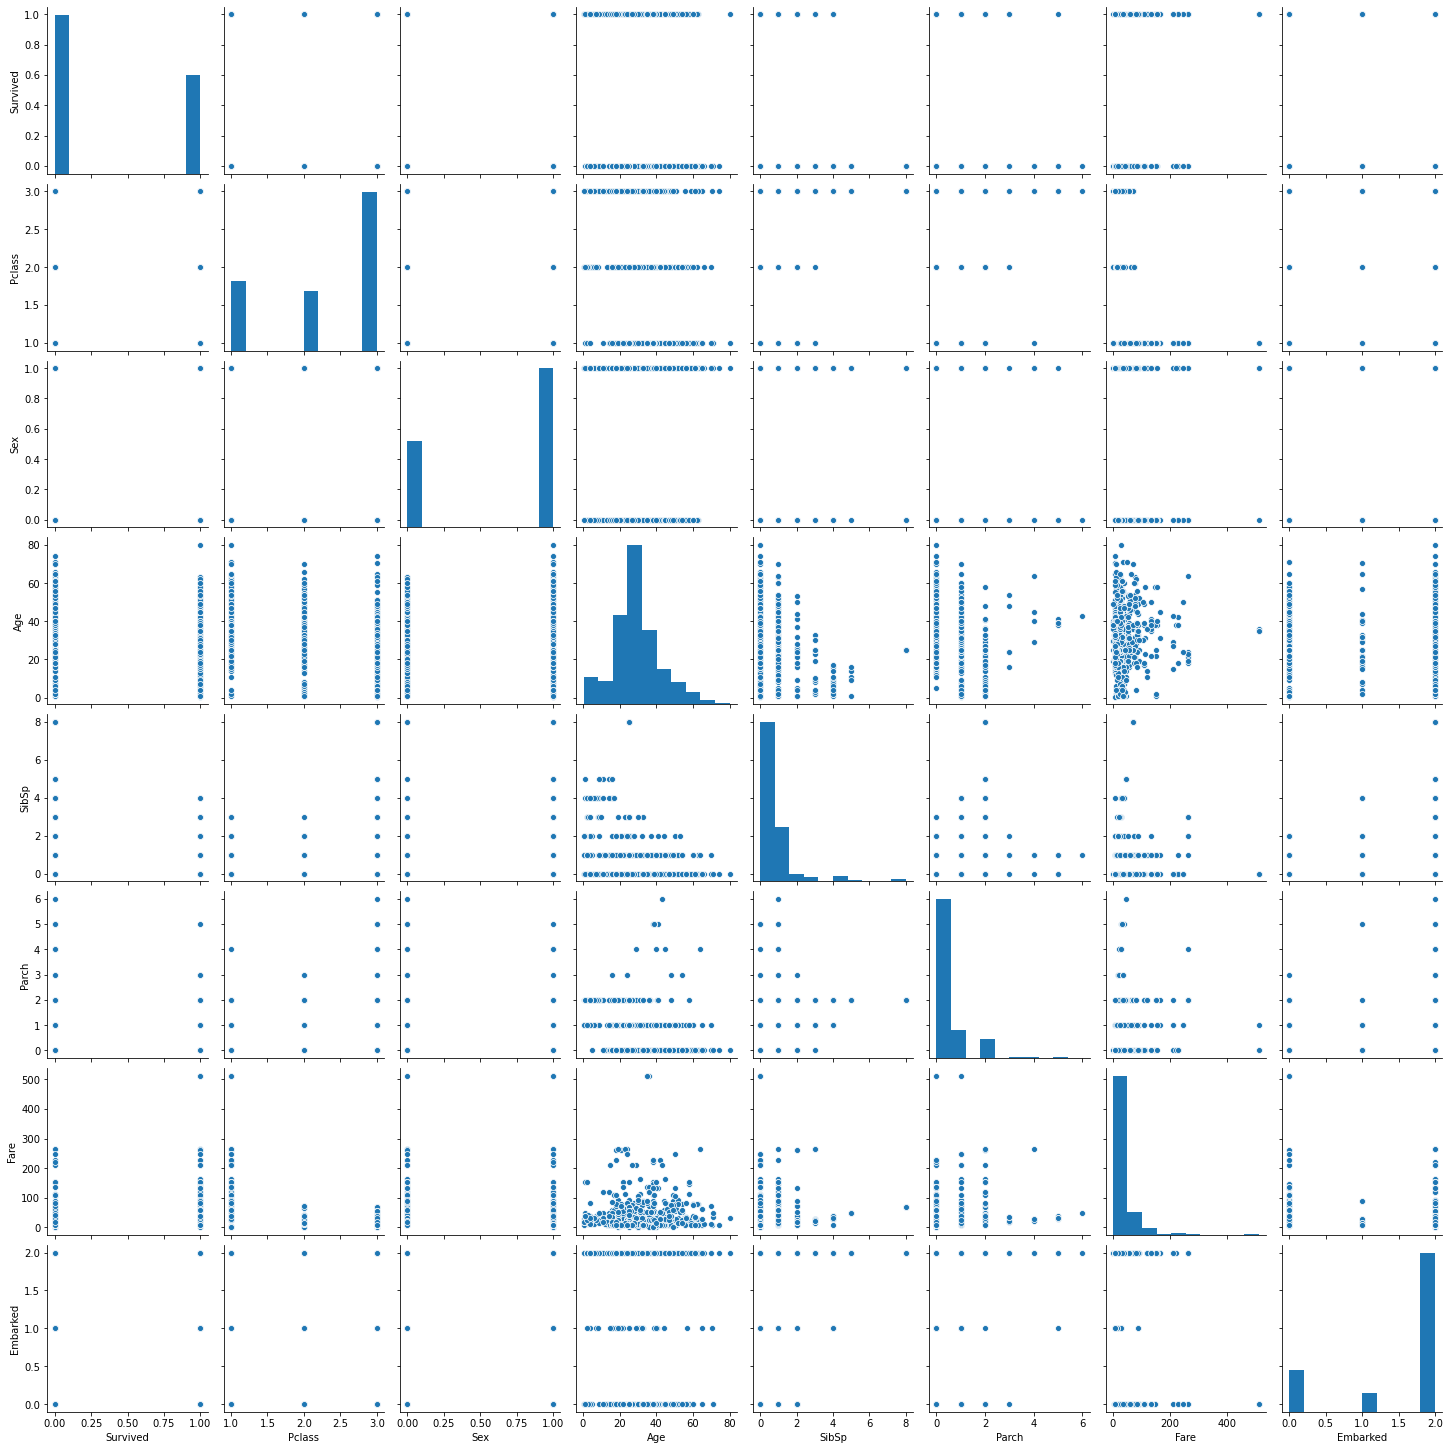

In [22]:
sns.pairplot(df)

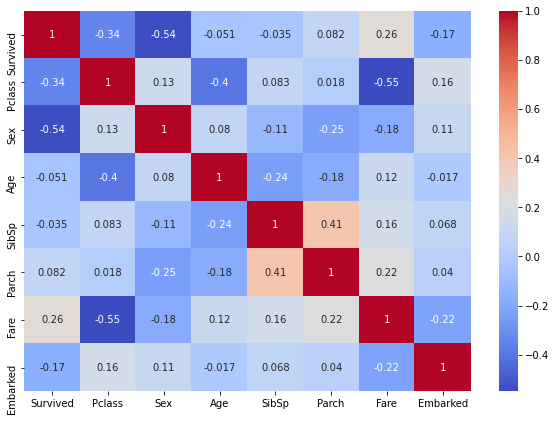

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

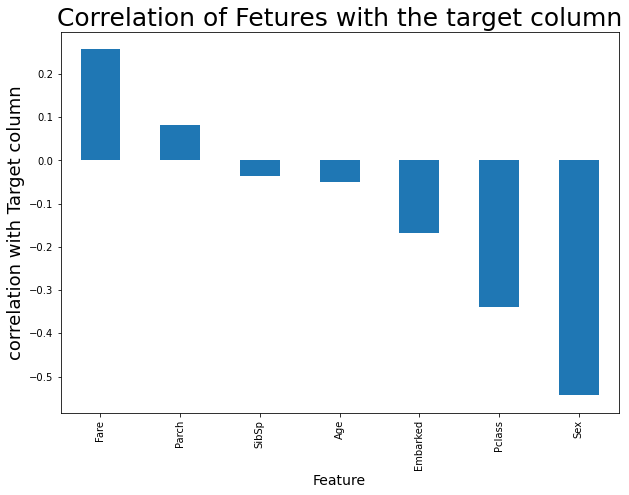

In [24]:
plt.figure(figsize=(10,7))
df.corr()["Survived"].sort_values(ascending=False).drop(["Survived"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Fetures with the target column", fontsize=25)
plt.show()

# Observation:
   ##### The above two observation shows that the Target Variable "Survived" have high negative correlation with Sex which actually means the survival rate of female gender is higher than the male as per the incident.
   ##### PClass variable also have negative high correlation.

In [25]:
import itertools

cols = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
length = len(cols)
cs = ["b","r","g","c","m","k","lime"]

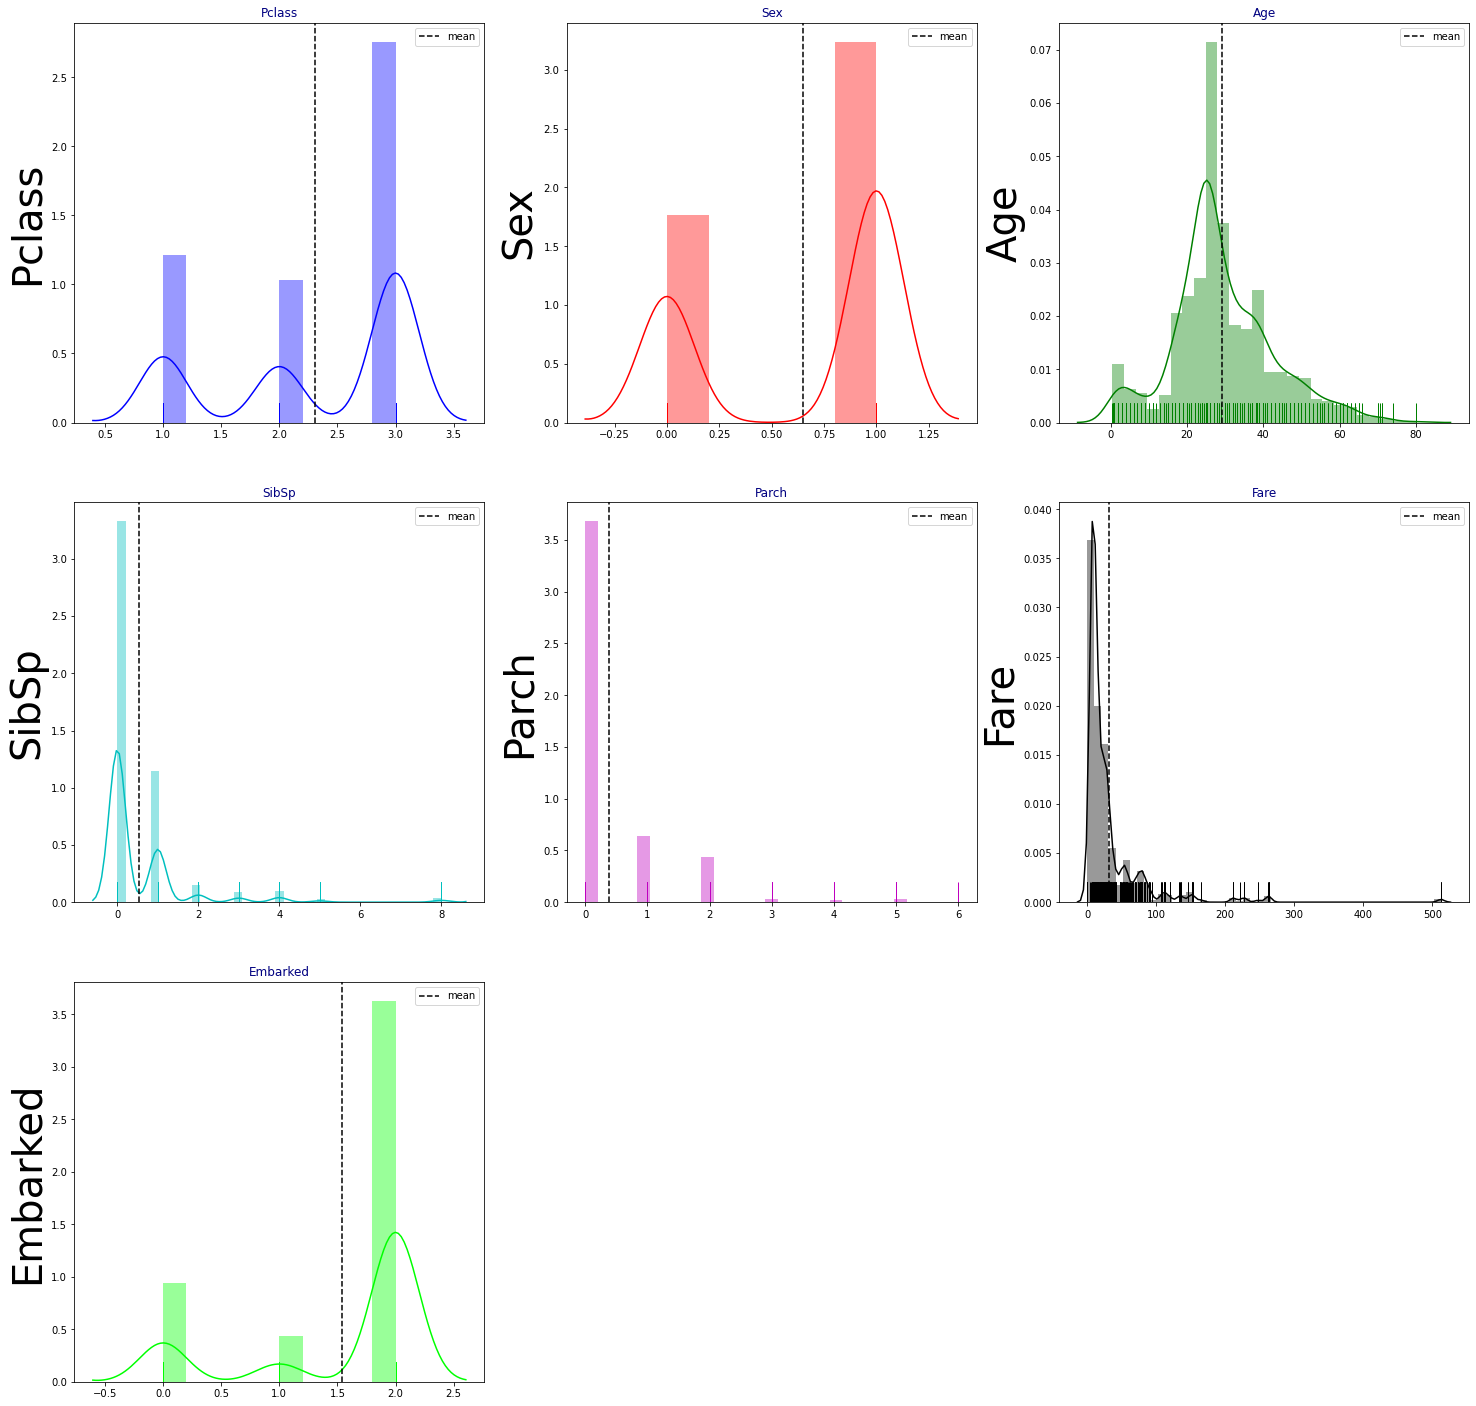

In [26]:
plt.figure(figsize=(25,25))
for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(3,3,j+1)
    ax= sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(), linestyle="dashed", label= "mean", color= "k")
    plt.legend(loc="best")
    plt.title(i,color = "navy")
    plt.xlabel("")
    plt.ylabel(i,fontsize = 40)

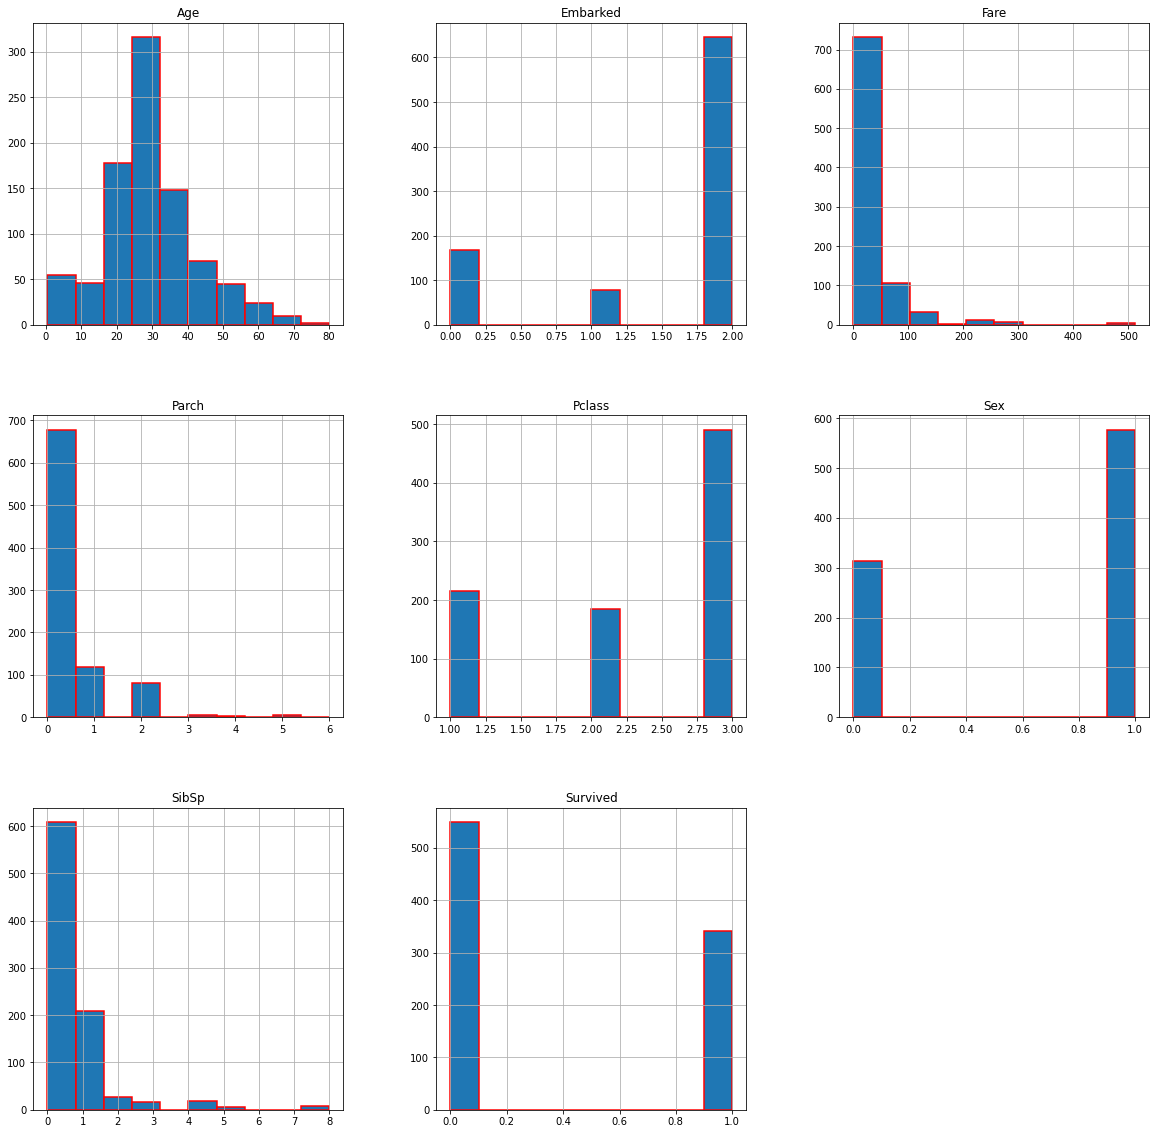

In [27]:
df.hist(edgecolor="red",linewidth= 1.5, figsize= (20,20))
plt.show()

In [28]:
x = df.drop(["Survived"], axis = 1)
y = df.Survived

# Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaledX= sc.fit_transform(x)

In [30]:
scaledX

array([[ 0.82737724,  0.73769513,  0.84882452, ..., -0.47367361,
        -0.49237783, -0.67817453],
       [-0.36936484,  0.73769513, -0.47662057, ...,  0.76762988,
        -0.41687275,  0.58595414],
       [-0.36936484,  0.73769513,  0.73521494, ..., -0.47367361,
        -0.12491979,  0.58595414],
       ...,
       [ 0.82737724, -1.35557354, -0.85531917, ..., -0.47367361,
        -0.28599728,  0.58595414],
       [ 0.82737724,  0.73769513, -0.85531917, ..., -0.47367361,
        -0.48633742,  0.58595414],
       [-1.56610693,  0.73769513, -1.91567525, ...,  2.00893337,
         0.99976961,  0.58595414]])

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [32]:
accu = 0
for i in range(0,20000):
    x_train, x_test, y_train, y_test = train_test_split(scaledX,y,test_size = .25, random_state = i)
    mod = LogisticRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    if acc> accu:
        accu= acc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")        
        

Best Accuracy 89.23766816143498 found on randomstate 15336


# Training the model

In [38]:
 x_train, x_test, y_train, y_test = train_test_split(scaledX,y,test_size = .25, random_state = 15336)

# Finding the Best model

Model Score : 0.7769461077844312
Accuracy Score of  LogisticRegression() is : 0.8923766816143498 


ConfusionMatrix of  LogisticRegression() is :

 [[130   9]
 [ 15  69]] 


classification_report of  LogisticRegression() is :
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       139
           1       0.88      0.82      0.85        84

    accuracy                           0.89       223
   macro avg       0.89      0.88      0.88       223
weighted avg       0.89      0.89      0.89       223
 


roc_auc_score of LogisticRegression()  is : 0.8783401849948612 




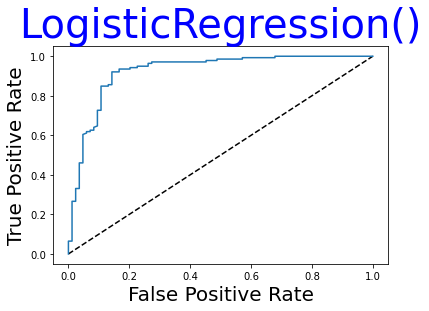





Model Score : 0.7709580838323353
Accuracy Score of  GaussianNB() is : 0.8565022421524664 


ConfusionMatrix of  GaussianNB() is :

 [[125  14]
 [ 18  66]] 


classification_report of  GaussianNB() is :
               precision    recall  f1-score   support

           0       0.87      0.90      0.89       139
           1       0.82      0.79      0.80        84

    accuracy                           0.86       223
   macro avg       0.85      0.84      0.85       223
weighted avg       0.86      0.86      0.86       223
 


roc_auc_score of GaussianNB()  is : 0.842497430626927 




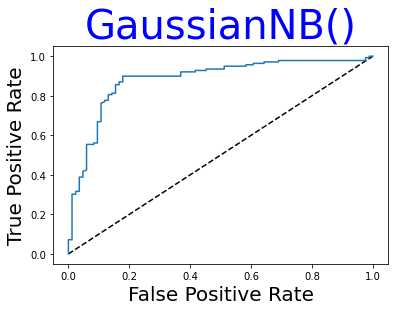

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score

model = [LogisticRegression(), GaussianNB()]

for m in model:
    
    m.fit(x_train,y_train)
    print("Model Score :" ,m.score(x_train,y_train))
    predm = m.predict(x_test)
    print("Accuracy Score of ",m,"is :",accuracy_score(y_test,predm),"\n\n")
    print("ConfusionMatrix of ",m,"is :\n\n",confusion_matrix(y_test,predm),"\n\n")     
    print("classification_report of ",m, "is :\n",classification_report(y_test,predm),"\n\n")
    print("roc_auc_score of",m, " is :", roc_auc_score(y_test,m.predict(x_test)),"\n\n")
    y_pred_prob = m.predict_proba(x_test)[:,0]
    tpr,fpr,threshold = roc_curve(y_test,y_pred_prob)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label = m)
    plt.xlabel('False Positive Rate',fontsize=20)
    plt.ylabel('True Positive Rate',fontsize=20)
    plt.title(m, fontsize=40, color="b")
    plt.show()      
          
    print('\n\n\n')

In [40]:
model = [ SVC(), DecisionTreeClassifier()]

for m in model:
    
    m.fit(x_train,y_train)
    print("Model Score :" ,m.score(x_train,y_train))
    predm = m.predict(x_test)
    print("Accuracy Score of ",m,"is :",accuracy_score(y_test,predm),"\n\n")
    print("ConfusionMatrix of ",m,"is :\n",confusion_matrix(y_test,predm),"\n\n")     
    print("classification_report of ",m, "is :\n",classification_report(y_test,predm),"\n\n")
    print("roc_auc_score of",m, " is :", roc_auc_score(y_test,m.predict(x_test)),"\n\n")
    print('\n\n\n')

Model Score : 0.8218562874251497
Accuracy Score of  SVC() is : 0.8878923766816144 


ConfusionMatrix of  SVC() is :
 [[134   5]
 [ 20  64]] 


classification_report of  SVC() is :
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       139
           1       0.93      0.76      0.84        84

    accuracy                           0.89       223
   macro avg       0.90      0.86      0.88       223
weighted avg       0.89      0.89      0.89       223
 


roc_auc_score of SVC()  is : 0.8629667694415896 






Model Score : 0.9835329341317365
Accuracy Score of  DecisionTreeClassifier() is : 0.7982062780269058 


ConfusionMatrix of  DecisionTreeClassifier() is :
 [[107  32]
 [ 13  71]] 


classification_report of  DecisionTreeClassifier() is :
               precision    recall  f1-score   support

           0       0.89      0.77      0.83       139
           1       0.69      0.85      0.76        84

    accuracy                    

# HYPER TUNING

# GRID SEARCH

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
 
parameters = {'n_estimators' : (10,30,50,70,90,100)
              , 'criterion' : ('gini', 'entropy')
              , 'max_depth' : (3,5,7,9,10)
              , 'max_features' : ('auto', 'sqrt')
              , 'min_samples_split' : (2,4,6)
             }
RF_grid  = GridSearchCV(RandomForestClassifier(n_jobs = -1, oob_score= False), param_grid = parameters, cv = 3, verbose = True)


In [42]:
RF_grid_model = RF_grid.fit(x_train, y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed:  3.2min finished


In [43]:
RF_grid_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_split=4,
                       n_estimators=90, n_jobs=-1)

Model Score : 0.9835329341317365
Accuracy Score of  DecisionTreeClassifier() is : 0.7982062780269058 


ConfusionMatrix of  DecisionTreeClassifier() is :

 [[107  32]
 [ 13  71]] 


classification_report of  DecisionTreeClassifier() is :
               precision    recall  f1-score   support

           0       0.89      0.77      0.83       139
           1       0.69      0.85      0.76        84

    accuracy                           0.80       223
   macro avg       0.79      0.81      0.79       223
weighted avg       0.82      0.80      0.80       223
 


roc_auc_score of DecisionTreeClassifier()  is : 0.8075111339499829 




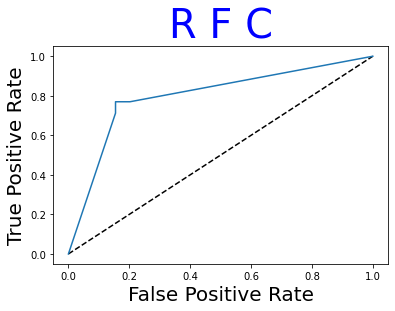

In [45]:
RFC=  RF_grid_model.best_estimator_

RFC.fit(x_train,y_train)
print("Model Score :" ,m.score(x_train,y_train))
predm = m.predict(x_test)
print("Accuracy Score of ",m,"is :",accuracy_score(y_test,predm),"\n\n")
print("ConfusionMatrix of ",m,"is :\n\n",confusion_matrix(y_test,predm),"\n\n")     
print("classification_report of ",m, "is :\n",classification_report(y_test,predm),"\n\n")
print("roc_auc_score of",m, " is :", roc_auc_score(y_test,m.predict(x_test)),"\n\n")
y_pred_prob = m.predict_proba(x_test)[:,0]
tpr,fpr,threshold = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = m)
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title("R F C", fontsize=40, color="b")
plt.show() 

# Serialization

##### From the above its is evident that the RandomForestClassifier(max_depth=9, max_features='sqrt', min_samples_split=4, n_estimators=90, n_jobs=-1) is the best Model since it has less difference between the Model Score and Accuracy Score.

In [46]:
import joblib
joblib.dump(RFC,"Titanic_Survied_model.pkl")

['Titanic_Survied_model.pkl']

In [47]:
RFC_from_joblib = joblib.load("Titanic_Survied_model.pkl")
RFC_from_joblib.predict(x_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0], dtype=int64)

In [48]:
print("Model Score test data :" ,RFC_from_joblib.score(x_test,y_test))

Model Score test data : 0.874439461883408
